# Titanic Survival Prediction Model Analysis

This notebook demonstrates the usage of the TitanicModel class for predicting passenger survival on the Titanic.

In [1]:
import sys
import os
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from src.titanic_model import TitanicModel

## 1. Load and Preprocess Data

In [5]:
model = TitanicModel()
X_train, X_test, y_train, y_test = model.load_and_preprocess_data('../data/titanic.csv')

print(f"Training set shape: {X_train.shape}")
print(f"Test set shape: {X_test.shape}")

Training set shape: (712, 7)
Test set shape: (179, 7)


/home/andre/projects/aaa-ml/src/titanic_model.py:19: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Age'].fillna(data['Age'].median(), inplace=True)
/home/andre/projects/aaa-ml/src/titanic_model.py:20: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[c

## 2. Train and Validate the Model

In [6]:
cv_scores = model.train_and_validate(X_train, y_train)

print(f"Cross-validation scores: {cv_scores}")
print(f"Mean CV score: {np.mean(cv_scores):.4f}")

Cross-validation scores: [0.81118881 0.75524476 0.81690141 0.76760563 0.83098592]
Mean CV score: 0.7964


## 3. Evaluate the Model

In [7]:
accuracy, precision, recall, f1 = model.evaluate(X_test, y_test)

print(f"Test set performance:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")

Test set performance:
Accuracy: 0.8212
Precision: 0.8205
Recall: 0.8212
F1-score: 0.8204


## 4. Visualize Results

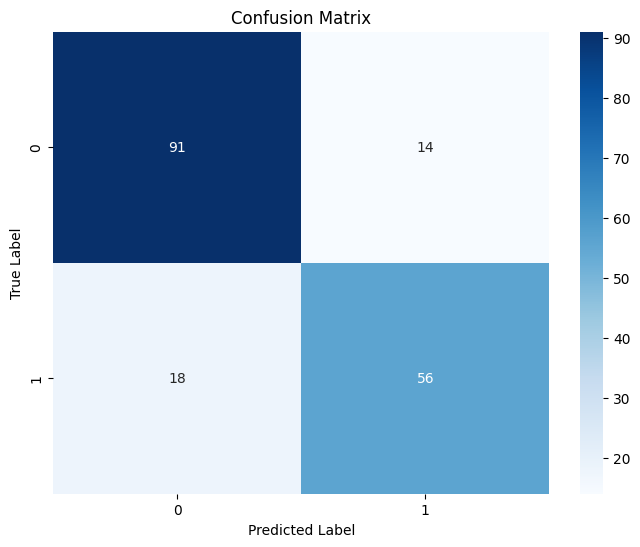

In [9]:
# Confusion Matrix
y_pred = model.model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

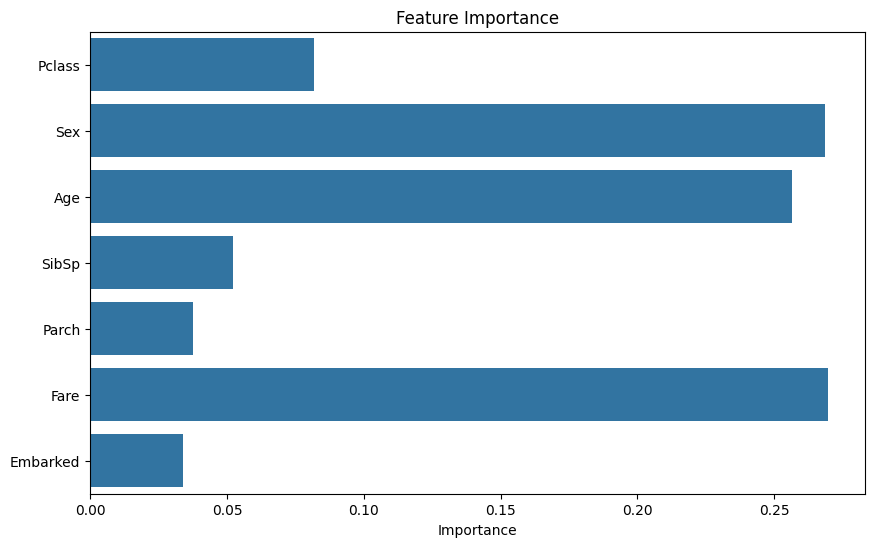

In [10]:
# Feature Importance
feature_importance = model.model.feature_importances_
feature_names = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']

plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importance, y=feature_names)
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.show()

## 5. Save and Load Model

In [11]:
# Save the model
model.save_model('../titanic_model.joblib')

# Load the model
loaded_model = TitanicModel()
loaded_model.load_model('../titanic_model.joblib')

# Verify that the loaded model produces the same results
loaded_accuracy, loaded_precision, loaded_recall, loaded_f1 = loaded_model.evaluate(X_test, y_test)

print(f"Loaded model performance:")
print(f"Accuracy: {loaded_accuracy:.4f}")
print(f"Precision: {loaded_precision:.4f}")
print(f"Recall: {loaded_recall:.4f}")
print(f"F1-score: {loaded_f1:.4f}")

assert np.allclose([accuracy, precision, recall, f1], [loaded_accuracy, loaded_precision, loaded_recall, loaded_f1]), \
    "Loaded model produces different results"

Loaded model performance:
Accuracy: 0.8212
Precision: 0.8205
Recall: 0.8212
F1-score: 0.8204
